In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [5]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///./Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
# reflect the tables

Base = automap_base()

Base.prepare(engine, reflect=True)

In [7]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
measures = Base.classes.measurement
station = Base.classes.station

In [9]:
inspector=inspect(engine)

In [10]:
measures_columns = inspector.get_columns('measurement')
for column in measures_columns: 
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [11]:
station_columns = inspector.get_columns('station')
for column in station_columns: 
    print(column["name"], column["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [12]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [13]:
# Find the most recent date in the data set.
last_date=session.query(measures.date).order_by(measures.date.desc()).first()
last_date

('2017-08-23')

In [14]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
session.query(measures.date).order_by(measures.date.desc()).first()
# Calculate the date one year from the last date in data set.
oneyr_ago = dt.date(2017,8,23) - dt.timedelta(days=365)
oneyr_ago

datetime.date(2016, 8, 23)

In [15]:
dates=session.query(measures.date).filter(measures.date > oneyr_ago).order_by(measures.date.desc()).all()
dates

[('2017-08-23'),
 ('2017-08-23'),
 ('2017-08-23'),
 ('2017-08-23'),
 ('2017-08-22'),
 ('2017-08-22'),
 ('2017-08-22'),
 ('2017-08-21'),
 ('2017-08-21'),
 ('2017-08-21'),
 ('2017-08-21'),
 ('2017-08-20'),
 ('2017-08-20'),
 ('2017-08-20'),
 ('2017-08-19'),
 ('2017-08-19'),
 ('2017-08-19'),
 ('2017-08-19'),
 ('2017-08-18'),
 ('2017-08-18'),
 ('2017-08-18'),
 ('2017-08-18'),
 ('2017-08-17'),
 ('2017-08-17'),
 ('2017-08-17'),
 ('2017-08-17'),
 ('2017-08-16'),
 ('2017-08-16'),
 ('2017-08-16'),
 ('2017-08-16'),
 ('2017-08-15'),
 ('2017-08-15'),
 ('2017-08-15'),
 ('2017-08-15'),
 ('2017-08-15'),
 ('2017-08-14'),
 ('2017-08-14'),
 ('2017-08-14'),
 ('2017-08-14'),
 ('2017-08-14'),
 ('2017-08-13'),
 ('2017-08-13'),
 ('2017-08-13'),
 ('2017-08-13'),
 ('2017-08-13'),
 ('2017-08-12'),
 ('2017-08-12'),
 ('2017-08-12'),
 ('2017-08-11'),
 ('2017-08-11'),
 ('2017-08-11'),
 ('2017-08-11'),
 ('2017-08-10'),
 ('2017-08-10'),
 ('2017-08-10'),
 ('2017-08-10'),
 ('2017-08-09'),
 ('2017-08-09'),
 ('2017-08-09'

In [16]:
# Perform a query to retrieve the data and precipitation scores

year_precip = session.query(measures.date, measures.prcp).\
    filter(measures.date >= oneyr_ago).\
    order_by(measures.date.asc()).all()

year_precip

[('2016-08-23', 0.0),
 ('2016-08-23', 0.15),
 ('2016-08-23', 0.05),
 ('2016-08-23', None),
 ('2016-08-23', 0.02),
 ('2016-08-23', 1.79),
 ('2016-08-23', 0.7),
 ('2016-08-24', 0.08),
 ('2016-08-24', 2.15),
 ('2016-08-24', 2.28),
 ('2016-08-24', None),
 ('2016-08-24', 1.22),
 ('2016-08-24', 2.15),
 ('2016-08-24', 1.45),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.21),
 ('2016-08-25', 0.06),
 ('2016-08-25', 0.11),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.03),
 ('2016-08-26', 0.02),
 ('2016-08-26', 0.04),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.01),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.18),
 ('2016-08-27', 0.02),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.12),
 ('2016-08-27', None),
 ('2016-08-28', 0.01),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.6),
 ('2016-08-28', 2.07),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.17),
 ('2016-08-29', 0.04),
 ('2016-08-29', None),
 ('2016-08-29', 0.0),

In [17]:
# Save the query results as a Pandas DataFrame and set the index to the date column
# Sort the dataframe by date
result_df = pd.DataFrame(year_precip, columns=['results_date', 'result_prcp'])
result_df.sort_values('results_date', inplace=True)
result_df.set_index('results_date', inplace=True)
result_df

,result_prcp
results_date,
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,0.05
2016-08-23,NaN
2016-08-23,0.02
...,...
2017-08-22,0.50
2017-08-23,0.08
2017-08-23,0.00


In [18]:
cleanresult_df=result_df.dropna()
cleanresult_df=cleanresult_df.rename(columns={"result_prcp": "Precipitation"})
cleanresult_df

,Precipitation
results_date,
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,0.05
2016-08-23,0.02
2016-08-23,1.79
...,...
2017-08-22,0.50
2017-08-23,0.08
2017-08-23,0.00


In [19]:
ymax = cleanresult_df.Precipitation.max()
ymax

6.7

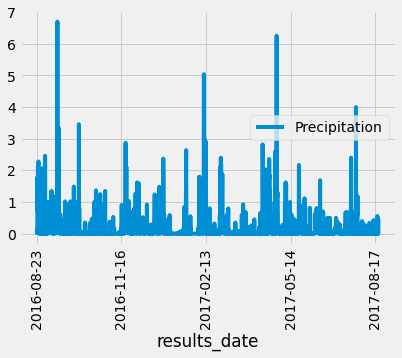

In [20]:
cleanresult_df.plot(rot=90)
plt.show()


In [21]:
# Use Pandas to calcualte the summary statistics for the precipitation data
cleanresult_df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [22]:
# Design a query to calculate the total number stations in the dataset
stations = session.query(measures.station).distinct().all()
len(stations)

9

In [23]:
stations

[('USC00519397'),
 ('USC00513117'),
 ('USC00514830'),
 ('USC00517948'),
 ('USC00518838'),
 ('USC00519523'),
 ('USC00519281'),
 ('USC00511918'),
 ('USC00516128')]

In [24]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
most_active=session.query(measures.station, func.count(measures.station)).group_by(measures.station).order_by(func.count(measures.station).desc()).first()
most_active

('USC00519281', 2772)

In [25]:
from scipy import stats
from numpy import mean

In [26]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.

most_active_avg=session.query(func.avg(measures.tobs)).filter(measures.station =='USC00519281').all()

most_active_max=session.query(func.max(measures.tobs)).filter(measures.station =='USC00519281').all()

most_active_min=session.query(func.min(measures.tobs)).filter(measures.station =='USC00519281').all()

print('For Station USC00519281')
print('------------------------')
print('Max Temp | Min Temp | Avg Temp')
print('----------------------------------')
print(most_active_max, most_active_min, most_active_avg)

For Station USC00519281
------------------------
Max Temp | Min Temp | Avg Temp
----------------------------------
[(85.0,)] [(54.0,)] [(71.66378066378067,)]


In [27]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

year_temp = session.query(measures.tobs, measures.date).\
    filter(measures.station =='USC00519281').\
    filter(measures.date >= oneyr_ago).\
    order_by(measures.date.asc()).all()

temp_df=pd.DataFrame(year_temp)
print(temp_df)

     tobs        date
0    77.0  2016-08-23
1    77.0  2016-08-24
2    80.0  2016-08-25
3    80.0  2016-08-26
4    75.0  2016-08-27
..    ...         ...
347  77.0  2017-08-14
348  77.0  2017-08-15
349  76.0  2017-08-16
350  76.0  2017-08-17
351  79.0  2017-08-18

[352 rows x 2 columns]


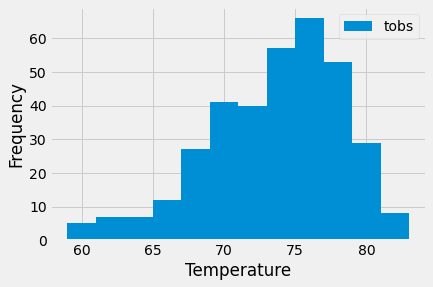

In [431]:
temp_df.plot.hist(bins=12)
plt.xlabel("Temperature")
plt.show()

# Close session

In [ ]:
# Close Session
session.close()